#### Model will fit even with the noice data or zeros as they are trying to find a way to fit the training data to the labels. Yet there will be accuracy for the validation set

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

In [2]:
(train_images, train_labels), _ = mnist.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [4]:
train_images = np.reshape(train_images, (60000, 28*28))
train_images = train_images.astype("float32")/255

In [5]:
train_images.shape

(60000, 784)

In [6]:
train_images_noice = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_zeros = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noice = model.fit(train_images_noice,
                          train_labels,
                          batch_size=128,
                          epochs=10,
                          validation_split=0.2)

model = get_model()
history_zero = model.fit(train_images_zeros,
                         train_labels,
                         batch_size=128,
                         epochs=10,
                         validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.6416 - accuracy: 0.8075 - val_loss: 0.2906 - val_accuracy: 0.9111
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2583 - accuracy: 0.9190 - val_loss: 0.2155 - val_accuracy: 0.9351
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1662 - accuracy: 0.9489 - val_loss: 0.2067 - val_accuracy: 0.9376
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1160 - accuracy: 0.9631 - val_loss: 0.1431 - val_accuracy: 0.9602
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0859 - accuracy: 0.9735 - val_loss: 0.1335 - val_accuracy: 0.9626
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0636 - accuracy: 0.9789 - val_loss: 0.1208 - val_accuracy: 0.9670
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.1266 - val_accuracy: 0.9642
Epoch 

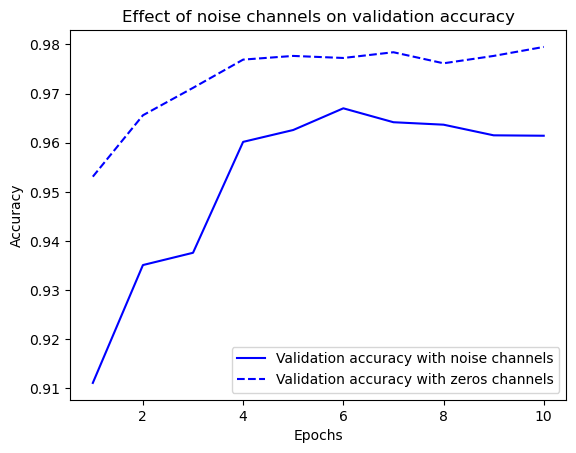

In [9]:
import matplotlib.pyplot as plt
val_acc_noice = history_noice.history["val_accuracy"]
val_acc_zero = history_zero.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noice, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zero, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()